## Ising Model Inference

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
import pandas as pd

In [2]:
Gx, Gy = 4, 4
neighbours = np.zeros((Gx*Gy,Gx*Gy))
states = np.arange(Gx*Gy).reshape((Gx, Gy), order="F").astype(int)

In [3]:
for i in range(0, Gx):

    for j in range(0, Gy):

        if (i-1 >= 0) and (j < Gy):
            neighbours[states[i-1][j], states[i][j]] = 1
            
        if (i+1 < Gx) and (j < Gy):
            neighbours[states[i+1][j], states[i][j]] = 1
            
        if (j-1 >= 0) and (i < Gx):
            neighbours[states[i][j-1], states[i][j]] = 1
            
        if (j+1 < Gy) and (i < Gx):
            neighbours[states[i][j+1], states[i][j]] = 1
            
normed_neighbours = neighbours / np.sum(neighbours, axis=1)
rounded = np.round(neighbours, 2).astype(int)
print(rounded.astype(int))

[[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]]


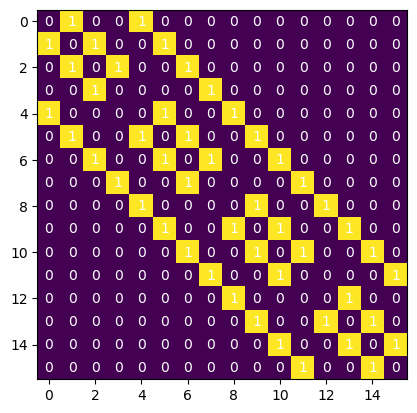

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(rounded)

for i in range(rounded.shape[0]):
    for j in range(rounded.shape[1]):
        text = ax.text(j, i, rounded[i, j],
        ha="center", va="center", color="w")

### Singly connected graph

In [5]:


def phi(x, y):
    # exp(beta*I(x==y))
    return np.exp((beta/4)*(x-y)**2)

In [6]:
beta = 0.01
states = [-1, 1]
p = [1/3, 2/2]

def message_pass(length, edge_p):
    
    gammas = []
    back_prop = []
    
    gammas.append({
        "message": "p(2|1)*p(1)",
        "0": [np.exp(beta)*p[0], p[1]], # gamma_b(a=1)
        "1": [p[0], np.exp(beta)*p[1]] # gamma_b(a=-1)
    })
    
    # Normalisation
    norm = sum(gammas[-1]["0"]) + sum(gammas[-1]["1"])
    gammas[-1]["0"] = gammas[-1]["0"]/norm
    gammas[-1]["1"] = gammas[-1]["1"]/norm
    
    for i in range(1, length-1):

        gammas.append({
            "message": "p(" + str(i+2) + "|" + str(i+1) + ")*γ_" + str(i) + "(" + str(i+1) + ")",
            "0": [np.exp(beta)*np.max(gammas[i-1]["0"]), 1*np.max(gammas[i-1]["1"])],
            "1": [1*np.max(gammas[i-1]["0"]), np.exp(beta)*np.max(gammas[i-1]["1"])]
        })
    
        # Normalisation
        norm = sum(gammas[-1]["0"]) + sum(gammas[-1]["1"])
        #norm = [1, 1]
        gammas[-1]["0"] = gammas[-1]["0"]/norm
        gammas[-1]["1"] = gammas[-1]["1"]/norm
    
    # Backwards pass
    to_max = [np.max(gammas[-i]["0"]), np.max(gammas[-i]["1"])]
    back_prop.append(str(np.argmax(to_max)))
    
    for i in range(2, length):
        
        to_max = [np.max(gammas[-i][back_prop[i-2]]), np.max(gammas[-i][back_prop[i-2]])]
        back_prop.append(str(np.argmax(to_max)))
        
    for i in range(0, length-1):
        gammas[i]["0"] = np.round(gammas[i]["0"], 3)
        gammas[i]["1"] = np.round(gammas[i]["1"], 3)
    
    return gammas, back_prop


In [7]:
g, b = message_pass(10, phi)

In [8]:
g

[{'message': 'p(2|1)*p(1)',
  '0': array([0.126, 0.373]),
  '1': array([0.124, 0.377])},
 {'message': 'p(3|2)*γ_1(2)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(4|3)*γ_2(3)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(5|4)*γ_3(4)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(6|5)*γ_4(5)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(7|6)*γ_5(6)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(8|7)*γ_6(7)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(9|8)*γ_7(8)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(10|9)*γ_8(9)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])}]

In [9]:
-2*np.array([int(x) for x in b]) + 1

array([-1,  1,  1,  1,  1,  1,  1,  1,  1])

## Mean Field Approximation

In [46]:
def proposal_distribution(alpha):
    q = np.exp(alpha) / (np.exp(alpha) + np.exp(-alpha))
    return q

In [65]:
def mean_field_approx(max_iter=10, beta=1, N=10):
    
    # initialise the state
    state = initial_state(N)
    initial = state.copy()

    potentials = boltzmann(beta)
    samples = []
    # Initial alpha
    alpha = 100
    
    # Initial spin distribution of each individual spin being in +1 state
    qn = np.ones((N, N)) * (1 / (1 + np.exp(-2*alpha)))
    
    for _ in tqdm(range(max_iter)):

        for i in range(N):
            for j in range(N):
                
                qn[i,j] = 0                

                for n in get_nearest_neighbours(i, j, N):
                    
                    qn[i,j] += beta * np.tanh(qn[n[0],n[1]])
                    
                u = np.random.uniform()
                q = qn[i,j]
                if u < q:
                    state[i,j] = 1
                else:
                    state[i,j] = -1
                    
    return qn

In [66]:
a = mean_field_approx()
proposal_distribution(a)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 377.42it/s]


array([[0.98162953, 0.99730869, 0.99747193, 0.99747358, 0.99747359,
        0.99747359, 0.99747358, 0.99747193, 0.99730869, 0.98162953],
       [0.99730869, 0.99965642, 0.99965986, 0.99965986, 0.99965986,
        0.99965986, 0.99965986, 0.99965986, 0.99965642, 0.99730869],
       [0.99747193, 0.99965986, 0.99966283, 0.99966283, 0.99966283,
        0.99966283, 0.99966283, 0.99966283, 0.99965986, 0.99747193],
       [0.99747358, 0.99965986, 0.99966283, 0.99966284, 0.99966284,
        0.99966284, 0.99966284, 0.99966283, 0.99965986, 0.99747358],
       [0.99747359, 0.99965986, 0.99966283, 0.99966284, 0.99966284,
        0.99966284, 0.99966284, 0.99966283, 0.99965986, 0.99747359],
       [0.99747359, 0.99965986, 0.99966283, 0.99966284, 0.99966284,
        0.99966284, 0.99966284, 0.99966283, 0.99965986, 0.99747359],
       [0.99747358, 0.99965986, 0.99966283, 0.99966284, 0.99966284,
        0.99966284, 0.99966284, 0.99966283, 0.99965986, 0.99747358],
       [0.99747193, 0.99965986, 0.9996628

array([[0.98162953, 0.99730869, 0.99747193, 0.99747358, 0.99747359,
        0.99747359, 0.99747358, 0.99747193, 0.99730869, 0.98162953],
       [0.99730869, 0.99965642, 0.99965986, 0.99965986, 0.99965986,
        0.99965986, 0.99965986, 0.99965986, 0.99965642, 0.99730869],
       [0.99747193, 0.99965986, 0.99966283, 0.99966283, 0.99966283,
        0.99966283, 0.99966283, 0.99966283, 0.99965986, 0.99747193],
       [0.99747358, 0.99965986, 0.99966283, 0.99966284, 0.99966284,
        0.99966284, 0.99966284, 0.99966283, 0.99965986, 0.99747358],
       [0.99747359, 0.99965986, 0.99966283, 0.99966284, 0.99966284,
        0.99966284, 0.99966284, 0.99966283, 0.99965986, 0.99747359],
       [0.99747359, 0.99965986, 0.99966283, 0.99966284, 0.99966284,
        0.99966284, 0.99966284, 0.99966283, 0.99965986, 0.99747359],
       [0.99747358, 0.99965986, 0.99966283, 0.99966284, 0.99966284,
        0.99966284, 0.99966284, 0.99966283, 0.99965986, 0.99747358],
       [0.99747193, 0.99965986, 0.9996628

## Gibb's Sampling

In [34]:
def get_nearest_neighbours(i, j, N):
    # only right and below neighbours to avoid double counting
    neighbors = []
    if i > 0:
        neighbors.append((i-1, j))
    if i < N-1:
        neighbors.append((i+1, j))
    if j > 0:
        neighbors.append((i, j-1))
    if j < N-1:
        neighbors.append((i, j+1))
        
    return neighbors

In [11]:
def potential_grid2(beta):
    return {'11': np.exp(beta),
           '1-1': np.exp(0),
           '-11': np.exp(0),
           '-1-1': np.exp(beta)}

In [12]:
def initial_state(N):
    return np.random.choice([-1, 1], size=(N, N))

In [13]:
betas = [4, 1, 0.01]

In [14]:
def boltzmann(beta):
    return {'11': np.exp(beta),
           '1-1': np.exp(0),
           '-11': np.exp(0),
           '-1-1': np.exp(beta)}

In [15]:
def gibbs_sampling(max_iter=10000, burn_in=100, beta=1.0, N=10):

    # initialise the state
    state = initial_state(N)
    initial = state.copy()

    potentials = boltzmann(beta)
    samples = []
    
    print("Processing...")
    for _ in range(max_iter):
        
        # Draw a coordinate at random 
        i, j = np.random.randint(0, N, size=2)
        
#         # Calculate the conditional probability
#         ps_plus, ps_minus = [], []
        
#         # Find all edge potentials between element i,j and it's nearest neighbours
#         for n in get_nearest_neighbours(i, j, N):
            
#             ps_plus.append(potentials["1" + str(state[n[0], n[1]])])
#             ps_minus.append(potentials["-1" + str(state[n[0], n[1]])])
        
#         # Take the product of the edge potentials and calculate p_tilde
#         p_tilde = np.prod(ps_plus) / np.prod(ps_minus)
        
#         # Calculate p using the formuala p = p_tilde / (1 + p_tilde)
#         p = p_tilde / (1 + p_tilde)

        # Alternative Method: calculate the free energy for si+ and si-
        E_splus, E_sminus = 0, 0
        J = 1
        
        for n in get_nearest_neighbours(i, j, N):
            E_splus += -0.5 * 1 * state[n[0], n[1]]
            E_sminus += -0.5 * -1 * state[n[0], n[1]]
        
        # Calculate delta E
        dE = E_splus - E_sminus
        
        # Conditional P
        cond_p = 1 / (1 + np.exp(beta * dE))
        
        # Draw a value U from a uniform distribution
        U = np.random.uniform()
        
        if U <= cond_p:
            state[i, j] = 1
        else:
            state[i, j] = -1

        #store the state
        samples.append(state.copy())
        # if no state flips in the last iteration break - fully converged
    print("Finished \n")
    #return samples[burn_in:], initial, state
    return samples, initial, state

In [23]:
samps = []
finals = []

for beta in betas:

    samples, initial, final = gibbs_sampling(max_iter=3000000, burn_in=100, beta=beta, N=10)
    samps.append([samples])
    finals.append(final)

Processing...
Finished 

Processing...
Finished 

Processing...
Finished 



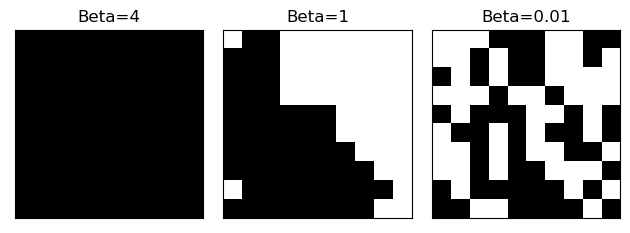

In [24]:
fig = plt.figure()
count = 0
rows, cols = 1, 3

for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, count + 1)
        plt.imshow(-1/finals[count], cmap="Greys_r")
        plt.title("Beta=" + str(betas[count]))# + ", Temp=" + str(1/betas[count]))
        
        ax = plt.gca()

        # Hide X and Y axes label marks
        ax.xaxis.set_tick_params(labelbottom=False)
        ax.yaxis.set_tick_params(labelleft=False)

        # Hide X and Y axes tick marks
        ax.set_xticks([])
        ax.set_yticks([])
        
        count += 1
        
plt.tight_layout()
plt.show()

In [25]:
def prob_distribution(samples, N=10):
    # compute the empirical distribution by counting the number of times each state is positive
    
    for i in range(len(samples)):
        samples[i] = (samples[i] == 1).astype(int)
    
    p = np.sum(samples, axis=0) / len(samples)

    return p

In [26]:
marginals = []
joints = []

for i in range(3):
    print("Processing...")
    margs = prob_distribution(samps[i][0])
    joint = margs[0,9]*margs[9,9]
    
    marginals.append(margs)
    joints.append(joint)
    print("Completed")

Processing...
Completed
Processing...
Completed
Processing...
Completed


In [27]:
for i in range(3):
    print("Beta = " + str(betas[i]))
    print("Top right: " + str(marginals[i][0, 9]))
    print("Bottom right: " + str(marginals[i][9, 9]) + "\n")

Beta = 4
Top right: 0.00039466666666666665
Bottom right: 0.0004366666666666667

Beta = 1
Top right: 0.38539666666666667
Bottom right: 0.3989063333333333

Beta = 0.01
Top right: 0.494846
Bottom right: 0.4941836666666667



In [89]:
p_tables = []

for i in range(len(betas)):
    
    tab = np.zeros((2, 2))
    
    # Probability tables for (+1,+1), (+1,-1), (-1, +1) and (-1, -1)
    # for the top right and bottom right nodes
    
    tab[0,0] = marginals[i][0, 9] * marginals[i][9, 9]
    tab[0,1] = marginals[i][0, 9] * (1 - marginals[i][9, 9])
    tab[1,0] = (1-marginals[i][0, 9]) * marginals[i][9, 9]
    tab[1,1] = (1-marginals[i][0, 9]) * (1-marginals[i][9, 9])
    
    p_tables.append(tab)
    
for i in range(len(betas)):
    print("Beta=" + str(betas[i]))
    print(p_tables[i])
    print("\n")

Beta=4
[[1.72337778e-07 3.94494329e-04]
 [4.36494329e-04 9.99168839e-01]]


Beta=1
[[0.15373717 0.2316595 ]
 [0.24516916 0.36943417]]


Beta=0.01
[[0.24454481 0.25030119]
 [0.24963886 0.25551514]]


